In [2]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [3]:
cryptodatafile = 'merged_crypto_data.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df


,Coin,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,"Mar 02, 2021",49612.11,50127.51,47228.85,48378.99,47530897720,"$901,933,683,269"
1,bitcoin,"Mar 01, 2021",45159.50,49784.02,45115.09,49631.24,53891300112,"$925,235,527,882"
2,bitcoin,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,53443887451,"$841,428,977,515"
3,bitcoin,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,45910946382,"$860,978,135,421"
4,bitcoin,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,350967941479,"$863,752,275,053"
...,...,...,...,...,...,...,...,...
26303,waves,"Jun 07, 2016",0.77,1.08,0.77,0.84,45932,$0
26304,waves,"Jun 06, 2016",0.71,1.17,0.71,0.77,95573,$0
26305,waves,"Jun 05, 2016",0.59,1.11,0.58,0.71,41700,$0
26306,waves,"Jun 04, 2016",1.09,1.29,0.58,0.59,4912,$0


In [4]:
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]

splitdate = pd.DataFrame()
splitdate[['month','day','year']] = RawCrypto_df['Date'].str.split("\s|,", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)
# splitdate['M'] = monthToNum(splitdate['M'])
splitdate

,month,day,year
0,3,02,2021
1,3,01,2021
2,2,28,2021
3,2,27,2021
4,2,26,2021
...,...,...,...
26303,6,07,2016
26304,6,06,2016
26305,6,05,2016
26306,6,04,2016


In [5]:
RawCrypto_df.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
RawCrypto_df

,Coin,Datestamp,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,2021-03-02,"Mar 02, 2021",49612.11,50127.51,47228.85,48378.99,47530897720,"$901,933,683,269"
1,bitcoin,2021-03-01,"Mar 01, 2021",45159.50,49784.02,45115.09,49631.24,53891300112,"$925,235,527,882"
2,bitcoin,2021-02-28,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,53443887451,"$841,428,977,515"
3,bitcoin,2021-02-27,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,45910946382,"$860,978,135,421"
4,bitcoin,2021-02-26,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,350967941479,"$863,752,275,053"
...,...,...,...,...,...,...,...,...,...
26303,waves,2016-06-07,"Jun 07, 2016",0.77,1.08,0.77,0.84,45932,$0
26304,waves,2016-06-06,"Jun 06, 2016",0.71,1.17,0.71,0.77,95573,$0
26305,waves,2016-06-05,"Jun 05, 2016",0.59,1.11,0.58,0.71,41700,$0
26306,waves,2016-06-04,"Jun 04, 2016",1.09,1.29,0.58,0.59,4912,$0


In [6]:
ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'ethereum'].sort_values(by='Datestamp')
litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'litecoin'].sort_values(by='Datestamp')
bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'bitcoin'].sort_values(by='Datestamp')
iota_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'iota'].sort_values(by='Datestamp')
monero_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'monero'].sort_values(by='Datestamp')
dash_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'dash'].sort_values(by='Datestamp')



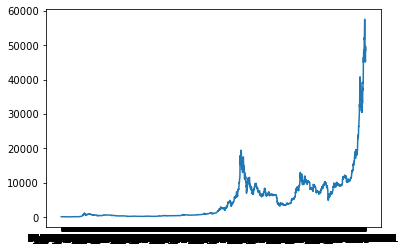

In [7]:
bitcoin_df.plot('Date','Close')

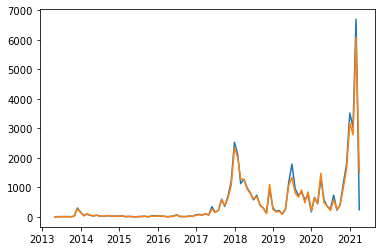

In [61]:
bitcoin_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))
plt.plot(bitcoin_groupbymonth_df[['High','Low']].std())

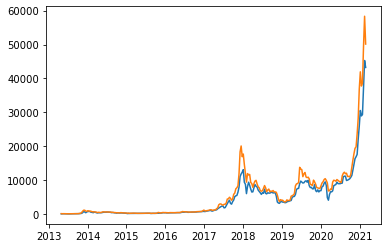

In [55]:
plt.plot(bitcoin_groupbymonth_df[['Low',]].min())
plt.plot(bitcoin_groupbymonth_df[['High']].max())
plt.title('Lowest and Highest Prices By Month')

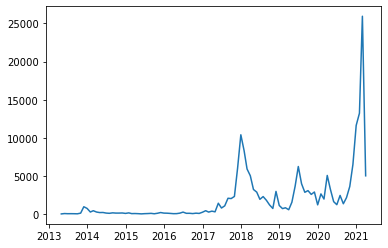

In [90]:
delta = bitcoin_groupbymonth_df['High'].max()
delta = pd.DataFrame(test)
delta['Low'] = bitcoin_groupbymonth_df['Low'].min()
delta['Delta'] = test['High'] - test['Low']
plt.plot(delta['Delta'])
